
# Assignment No 4c
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement and test different variants of Random Forests.For this part you will be implementing randomized version of **Randomized Linear** weak learner based Random Forest, i.e. you will be randomly selecting a pair of  features from all set of features and than randomly selecting the parameters for a generic equation of line,i.e. $ax+by+c=0$.

## TODO: 

**Complete the child class LinearWeakLearner in file `weaklearner.py` by writing the missing code.**

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.



In [1]:
!pip install nose
%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 163kB 2.8MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/'Colab Notebooks'/'Assignment 4'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Assignment 4


In [3]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..
import time 

In [0]:
# Create some dummy data for testing
np.random.seed(seed=99)

## Let's cook some data up for a multi-class classification problem...

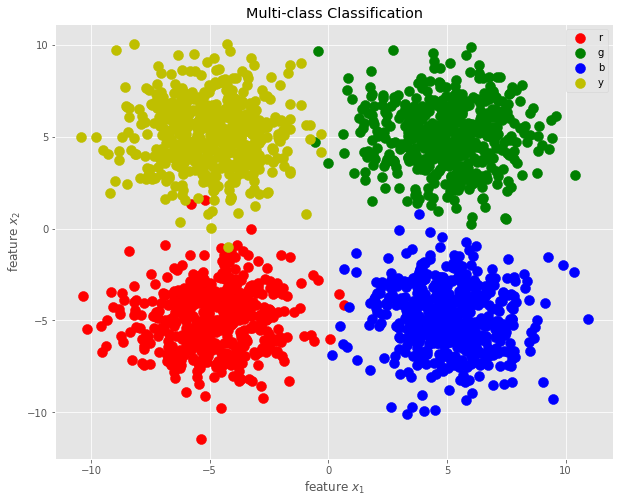

In [6]:
#generate training and testing set...by sampling from mutli-variate Gaussian
cp=5
nclasses=2
mean1 = [-cp,-cp]
mean2 = [cp,cp]
mean3 = [cp,-cp]
mean4 = [-cp,cp]
cov = [[3.0,0.0],[0.0,3.0]] 

#create some points for the training set...
nexamples=2000
x1 = np.random.multivariate_normal(mean1,cov,nexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,nexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples//4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples//4,1)),2*np.ones((nexamples//4,1)),3*np.ones((nexamples//4,1)),4*np.ones((nexamples//4,1))))


plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='g', s=100)            
plt.scatter(x3[:,0],x3[:,1], c='b', s=100)
plt.scatter(x4[:,0],x4[:,1], c='y', s=100)            



plt.title("Multi-class Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")
plt.legend(['r','g','b','y'])
fig_ml_in_10 = plt.gcf()
plt.savefig('multi-linear-class.svg',format='svg')
#create some points for the training set..

ntexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,ntexamples//4)
x2 = np.random.multivariate_normal(mean2,cov,ntexamples//4)
x3 = np.random.multivariate_normal(mean3,cov,ntexamples//4)
x4 = np.random.multivariate_normal(mean4,cov,ntexamples//4)

Xt=np.vstack((x1,x2,x3,x4))
Yt=np.vstack((1*np.ones((ntexamples//4,1)),2*np.ones((ntexamples//4,1)),3*np.ones((ntexamples//4,1)),4*np.ones((ntexamples//4,1))))


In [0]:
import randomForest as rf

In [0]:
rfc=rf.RandomForest(weaklearner='Linear')

In [9]:
print (X.shape, Y.shape)

(2000, 2) (2000, 1)


In [10]:
# %pdb
rfc.train(X,Y)


Building Classifier

Creating tree # 1
Creating Left Child Node With 963 Examples, and Right Node with 1037 Examples
Creating Left Child Node With 476 Examples, and Right Node with 487 Examples
Creating Left Child Node With 0 Examples, and Right Node with 476 Examples
Creating Left Child Node With 0 Examples, and Right Node with 476 Examples
Creating Child Node With ClassLabel=2.0, nexamples=476, classes=[(2.0, 0.9978991596638656), (3.0, 0.0021008403361344537)]
Creating Child Node With ClassLabel=3.0, nexamples=487, classes=[(3.0, 1.0)]
Creating Left Child Node With 536 Examples, and Right Node with 501 Examples
Creating Left Child Node With 39 Examples, and Right Node with 497 Examples
Creating Left Child Node With 19 Examples, and Right Node with 20 Examples
Creating Child Node With ClassLabel=2.0, nexamples=19, classes=[(2.0, 0.9473684210526315), (4.0, 0.05263157894736842)]
Creating Child Node With ClassLabel=4.0, nexamples=20, classes=[(4.0, 0.65), (1.0, 0.35)]
Creating Left Child

In [11]:
len(rfc.trees)

10

In [12]:
# %pdb
# Training Confusion Matrix...
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(2000, 1) 2000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,496,0,2,2,500
2.0,0,497,0,3,500
3.0,0,1,499,0,500
4.0,2,0,0,498,500
All,498,498,501,503,2000


In [13]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Yp))
tlabels = pd.Series(np.squeeze(Y))
acc = np.sum(tlabels == plabels) / len(Y)
print(acc)
assert_greater_equal(acc, 0.78)

0.995


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

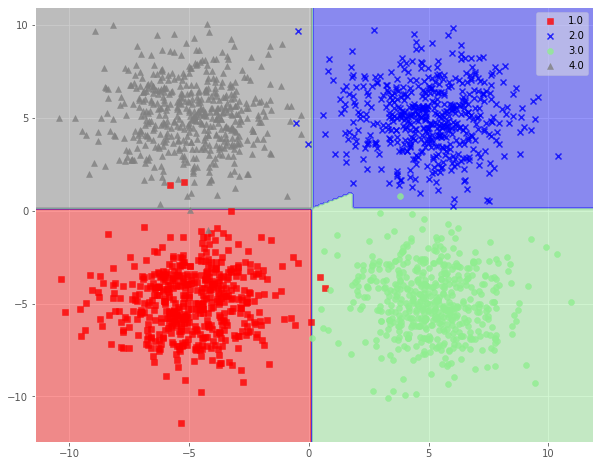

In [14]:
#It might take time, a little longer than the desired
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('training-boundary-rf-rlinear-10trees.svg',format='svg')

In [15]:
#Testing Confusion Matrix...
Ypt=rfc.predict(Xt)
print (Yt.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Yt)

(1000, 1) 1000


Predicted,1.0,2.0,3.0,4.0,All
Actual,,,,,
1.0,250,0,0,0,250
2.0,0,248,1,1,250
3.0,1,1,248,0,250
4.0,1,0,0,249,250
All,252,249,249,250,1000


In [16]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Ypt))
tlabels = pd.Series(np.squeeze(Yt))
acc = np.sum(tlabels == plabels) / len(Yt)
print(acc)
assert_greater_equal(acc, 0.78)

0.995


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

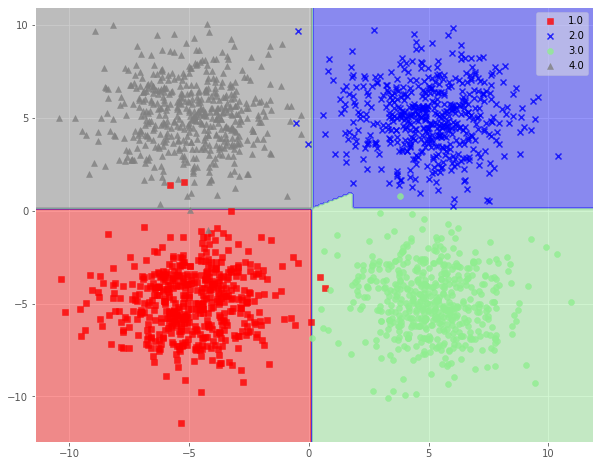

In [17]:
t.plot_decision_regions(X,np.squeeze(Y), clf=rfc,res=0.1);
plt.savefig('testing-boundary-rf-raa-10trees.svg',format='svg')

(10000, 2)
[1.0, 2.0, 3.0, 4.0]


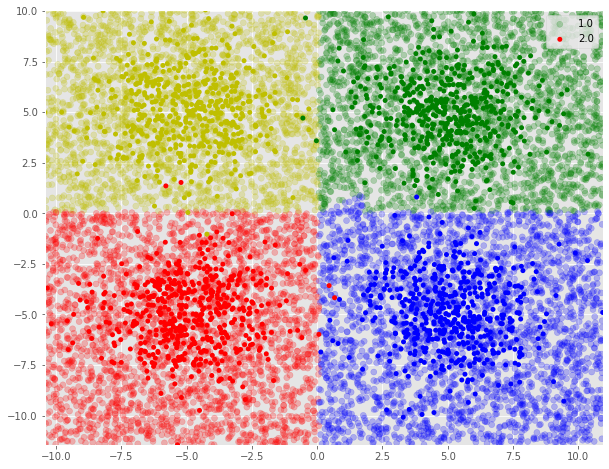

In [18]:
#plt.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (14.0, 8.0)
# %pdb
t.plot_points_range(rfc,X,Y,10000)

### Lets Plot Per-Tree Decision Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<function matplotlib.pyplot.tight_layout>

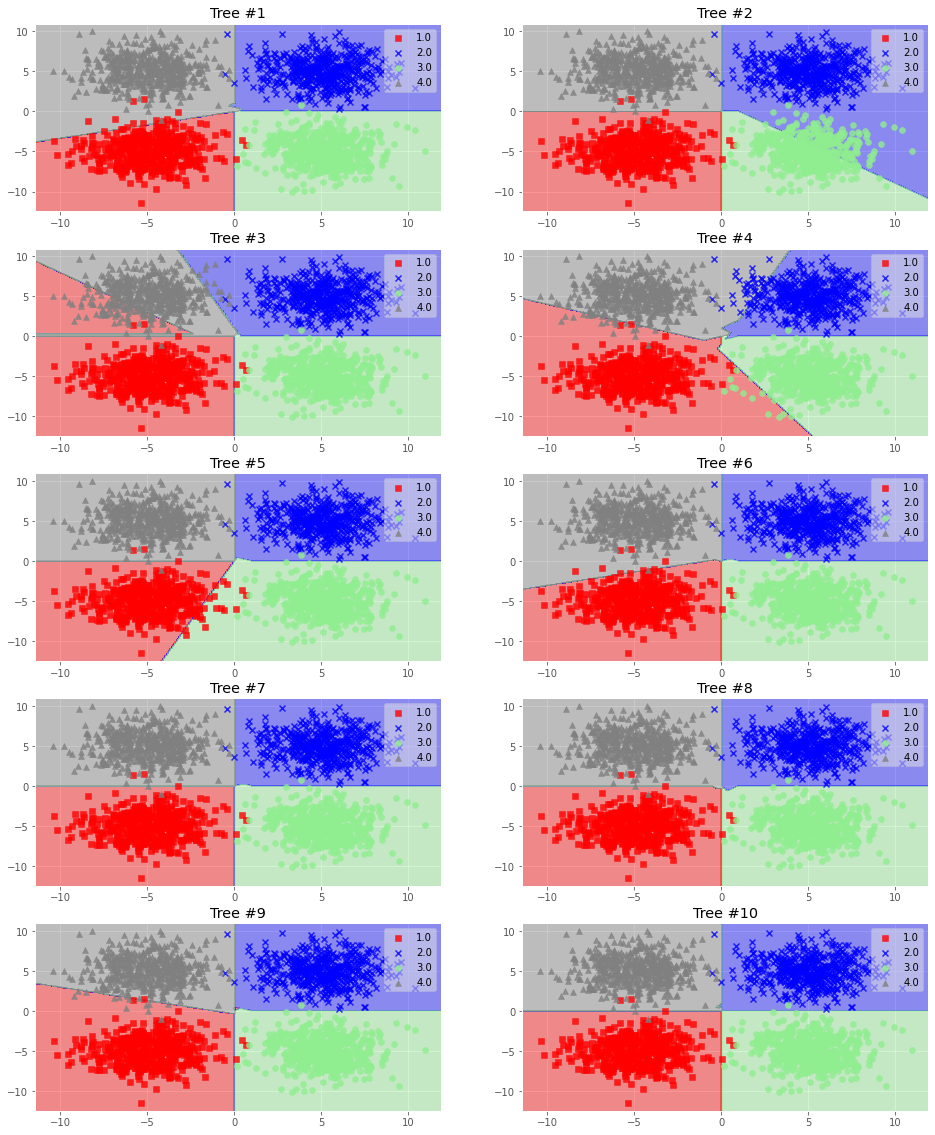

In [19]:
#@title Default title text
ntrees=rfc.ntrees
nrows=int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,20))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,np.squeeze(Y),clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout

#### What Can You conclude

## Lets Run on Nonlinear Data, The Spherical Examples...

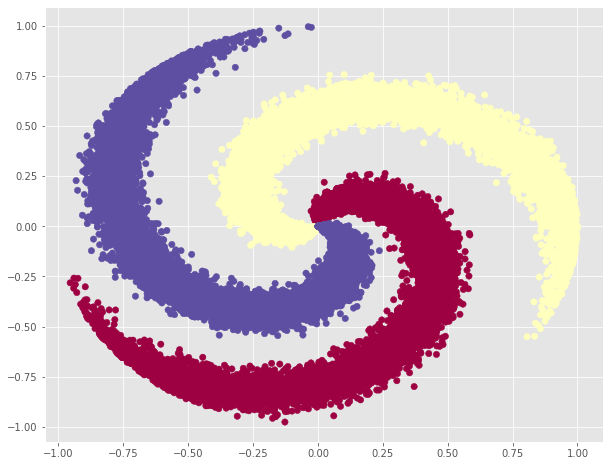

In [20]:
#Get Training Data from a spherical distribution and ...
X,Y=t.get_spherical_data(N=10000)


In [21]:
print (X.shape, Y.shape)

(30000, 2) (30000,)


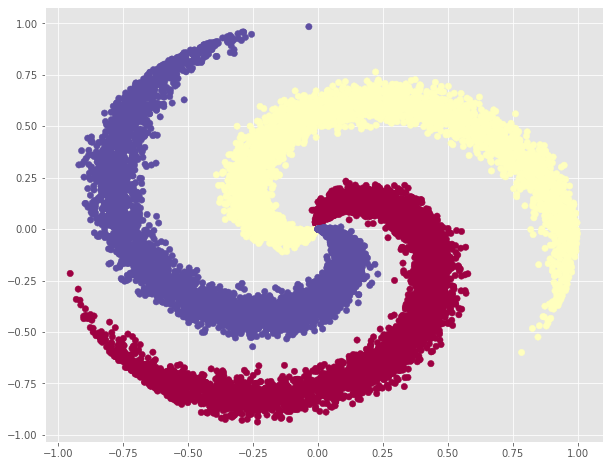

In [22]:
#Get Test Data 
Xtest,Ytest=t.get_spherical_data(N=5000)

In [23]:
rfc=rf.RandomForest(weaklearner='Linear',usebagging=False,ntrees=20)
rfc.train(X,Y[:,np.newaxis])


Building Classifier

Creating tree # 1
Creating Left Child Node With 25158 Examples, and Right Node with 4842 Examples
Creating Left Child Node With 13707 Examples, and Right Node with 11451 Examples
Creating Left Child Node With 5089 Examples, and Right Node with 8618 Examples
Creating Left Child Node With 4954 Examples, and Right Node with 135 Examples
Creating Child Node With ClassLabel=1, nexamples=4954, classes=[(1, 0.9989907145740815), (0, 0.0008074283407347598), (2, 0.00020185708518368994)]
Creating Child Node With ClassLabel=2, nexamples=135, classes=[(2, 1.0)]
Creating Left Child Node With 5640 Examples, and Right Node with 2978 Examples
Creating Child Node With ClassLabel=0, nexamples=5640, classes=[(0, 0.4888297872340426), (2, 0.46382978723404256), (1, 0.04734042553191489)]
Creating Child Node With ClassLabel=0, nexamples=2978, classes=[(0, 0.8529214237743452), (1, 0.1470785762256548)]
Creating Left Child Node With 8893 Examples, and Right Node with 2558 Examples
Creating L

In [24]:
#Training Confusion Matrix
Yp=rfc.predict(X)
print (Y.shape, len(Yp))
t.print_confusion_matrix(Yp,Y)

(30000,) 30000


Predicted,0,1,2,All
Actual,,,,
0,9889,5,106,10000
1,192,9805,3,10000
2,221,7,9772,10000
All,10302,9817,9881,30000


In [25]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Yp))
tlabels = pd.Series(np.squeeze(Y))
acc = np.sum(tlabels == plabels) / len(Y)
print(acc)
assert_greater_equal(acc, 0.78)

0.9822


In [26]:
#Testing Confusion Matrix
Ypt=rfc.predict(Xtest)
print (Ytest.shape, len(Ypt))
t.print_confusion_matrix(Ypt,Ytest)

(15000,) 15000


Predicted,0,1,2,All
Actual,,,,
0,4957,2,41,5000
1,100,4900,0,5000
2,113,1,4886,5000
All,5170,4903,4927,15000


In [27]:
from nose.tools import assert_greater_equal
plabels = pd.Series(np.squeeze(Ypt))
tlabels = pd.Series(np.squeeze(Ytest))
acc = np.sum(tlabels == plabels) / len(Ytest)
print(acc)
assert_greater_equal(acc, 0.78)

0.9828666666666667


(10000, 2)
[0, 1, 2]


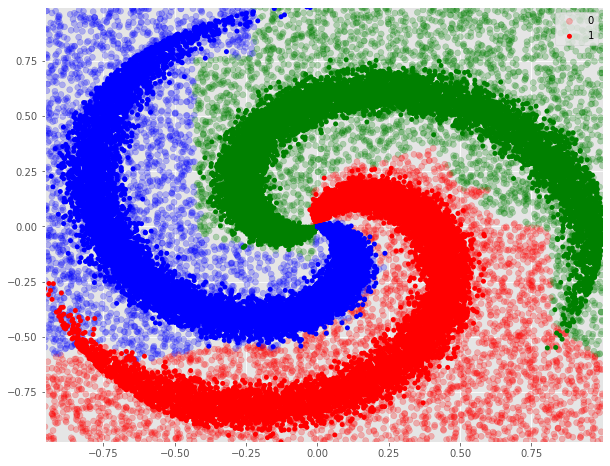

In [28]:
t.plot_points_range(rfc,X,Y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


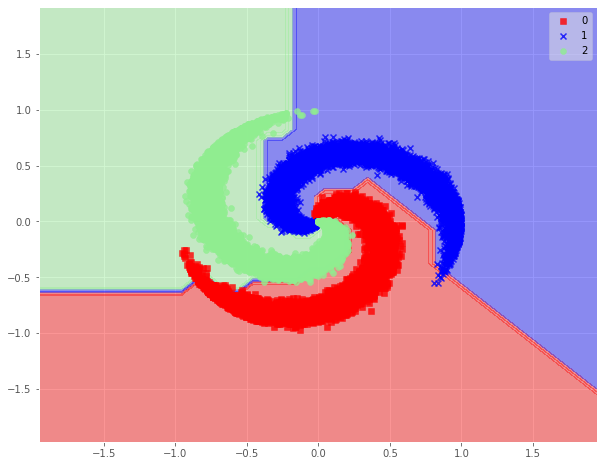

In [29]:
t.plot_decision_regions(X,Y,rfc,res=0.1)

### Lets Plot Per-Tree Decision Boundary

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<function matplotlib.pyplot.tight_layout>

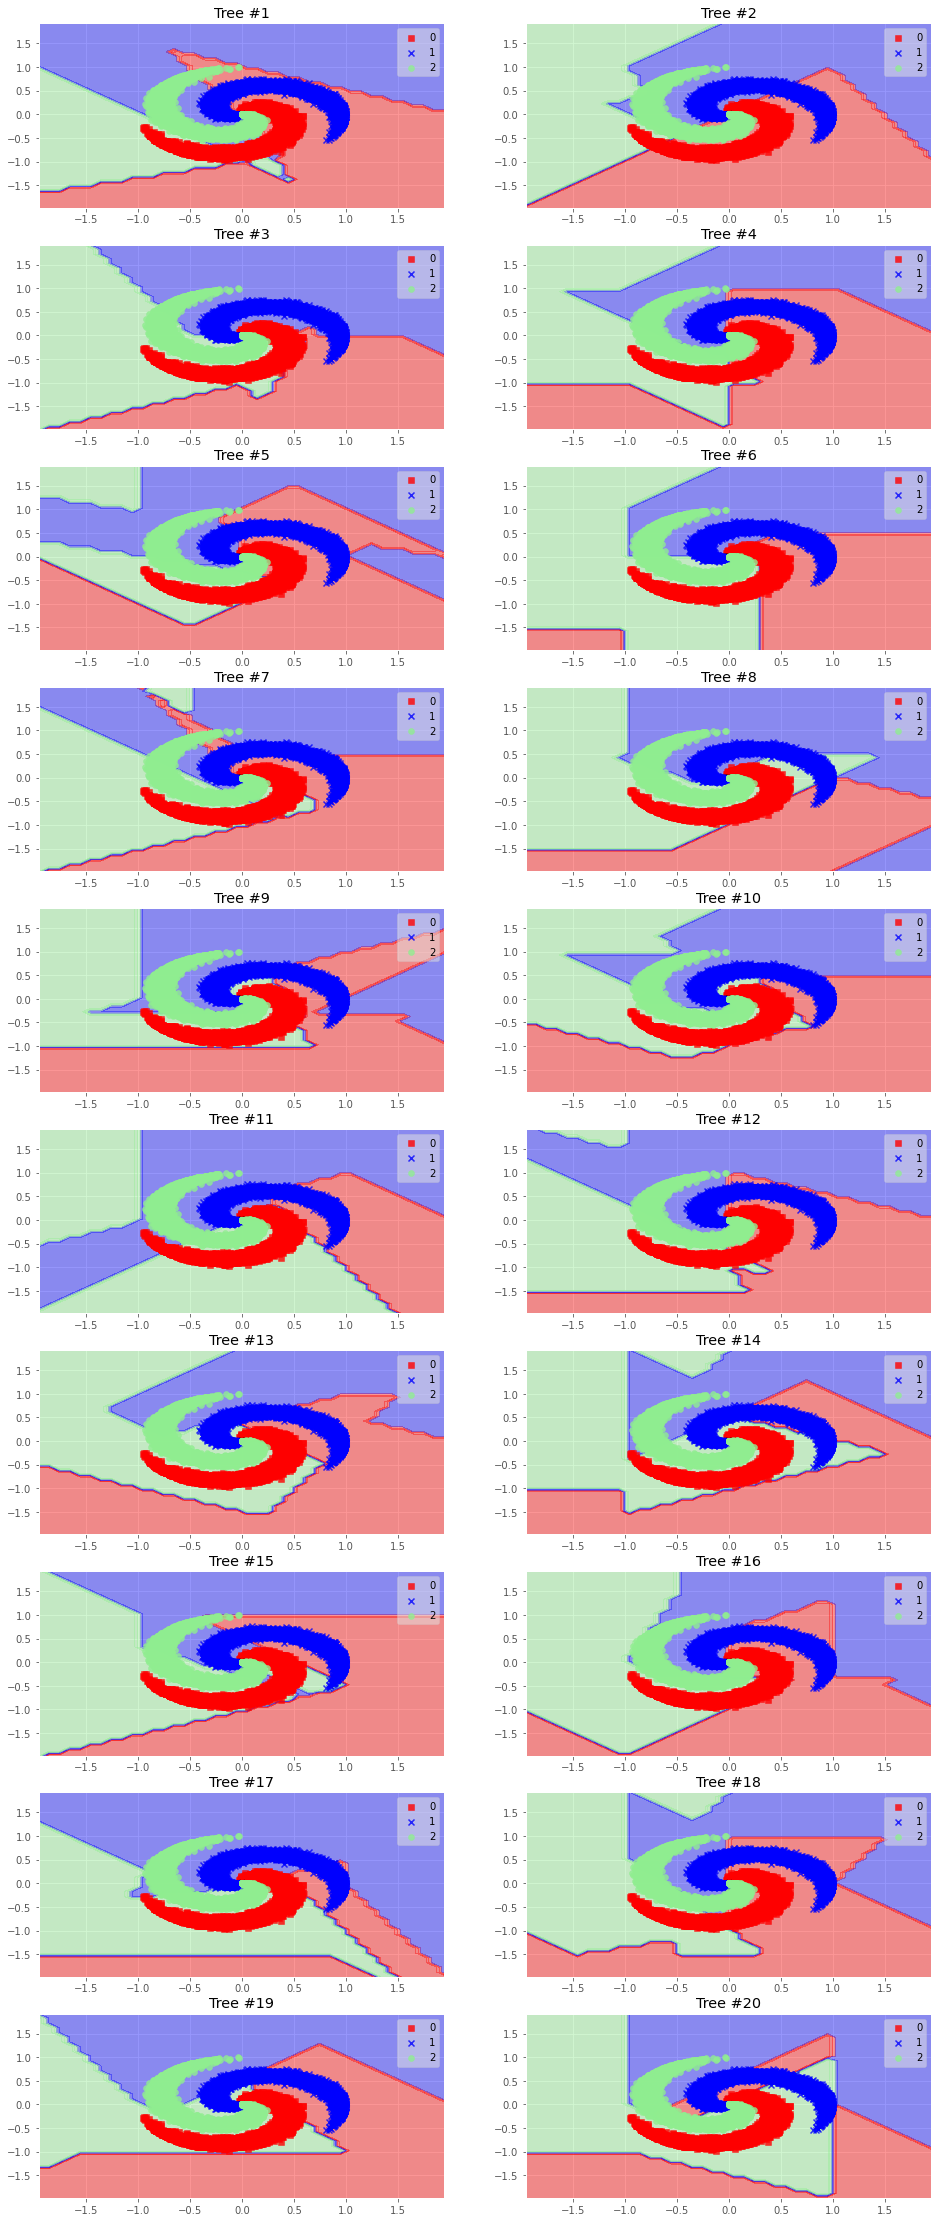

In [30]:
ntrees=rfc.ntrees
nrows=int(ntrees/2)
ncols=2
i=1
plt.subplots(nrows,ncols,figsize=(16,40))
for tree in rfc.trees:
    plt.subplot(nrows,ncols,i);
    t.plot_decision_regions(X,Y,clf=tree,res=0.1);
    plt.title('Tree #{}'.format(i))
    i=i+1
plt.tight_layout
    

## TODO: Find Optimal Number of Trees for this data set, using cross validation...

In [0]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, V_train, Y_train, V_test = train_test_split(X, Y, train_size=0.8)
print(X_train.shape, V_train.shape, Y_train.shape, V_test.shape)

(24000, 2) (6000, 2) (24000,) (6000,)


In [33]:

rfc = rf.RandomForest(weaklearner="Linear", usebagging= True)
rfc.train(X_train,Y_train, V_train, V_test)
# rfc.train(X_train,Y_train)


Creating Classifier with 10 trees.
Accuracy of Classifier with 10 trees is 97.51666666666667.
Creating Classifier with 12 trees.
Accuracy of Classifier with 12 trees is 95.38333333333333.
Creating Classifier with 14 trees.
Accuracy of Classifier with 14 trees is 96.39999999999999.
Creating Classifier with 16 trees.
Accuracy of Classifier with 16 trees is 94.08333333333333.
Creating Classifier with 18 trees.
Accuracy of Classifier with 18 trees is 96.0.
Creating Classifier with 20 trees.
Accuracy of Classifier with 20 trees is 95.75.
Creating Classifier with 22 trees.
Accuracy of Classifier with 22 trees is 98.01666666666667.
Creating Classifier with 24 trees.
Accuracy of Classifier with 24 trees is 98.05.
Creating Classifier with 26 trees.
Accuracy of Classifier with 26 trees is 96.38333333333333.
Creating Classifier with 28 trees.
Accuracy of Classifier with 28 trees is 90.26666666666667.
Creating Classifier with 30 trees.
Accuracy of Classifier with 30 trees is 97.15.
Validation Comp